# Expediting Car Evaluations with ML 
###  Data Science and Advanced Analytics
###  Machine Learning 1st Phase Delivery

**Group 18**  
- Diogo Tibério         20250341
- José Montez           20250351
- Henrique Figueiredo   20250433
- Sebastião Jerónimo    20240660


<a id="index"></a>
## Index

1. [Introduction to the Project](#introduction)  
   - 1.1. [Project Overview & Objectives](#project_overview)
   - 1.2. [Dataset Import data exploration](#data_exploration)  
      - 1.2.1. [Import Libraries](#import_libraries)
      - 1.2.3. [Dataset Import and Initial Checks](#dataset_import)
         - 1.2.3.1 [Verify Dataset Integrity](#check_imports)
      - 1.2.4. [Dataset Metadata Description](#metadata_description)
      - 1.2.5. [Descriptive Statistics](#descriptive_statistics)
      - 1.2.6. [Exploratory Data Analysis (EDA)](#eda)
         - 1.2.6.1. [Univariate Analysis](#univariate_analysis)
         - 1.2.6.2. [Multivariate Relationships](#multivariate_analysis)  

2. [Data Preparation](#data_preparation)  
   - 2.1. [Handling Missing Values](#handling_missing_values)  
   - 2.2. [Outlier Detection and Treatment](#outliers)  
   - 2.3. [Categorical Variable Encoding](#categorical_encoding)  
   - 2.4. [Feature Engineering](#feature_engineering)  
   - 2.5. [Data Scaling and Normalization](#data_scaling)  

3. [Feature Selection](#feature_selection)  
   - 3.1. [Feature Selection Strategy](#selection_strategy)  
   - 3.2. [Implementation and Results](#selection_implementation)  
   - 3.3. [Final Feature Set Justification](#feature_justification)  

4. [Model Building and Evaluation](#model_building)  
   - 4.1. [Problem Type Identification](#problem_type)  
   - 4.2. [Algorithm Selection](#algorithm_selection)  
   - 4.3. [Model Assessment Strategy](#assessment_strategy)  
   - 4.4. [Model Training and Prediction](#model_training)  
   - 4.5. [Performance Metrics and Interpretation](#performance_metrics)  


<hr>
<a class="anchor" id="introduction"></a>

# 1. Introduction to the Project

Cars 4 You is an online car resale company that sells cars from multiple different brands.

The company's goal is to replace the evaluation process by creating a predictive model capable of evaluating the price of a car based on the user’s input without needing the car to be taken to a mechanic.

This project aims to build this model.

<hr>
<a class="anchor" id="project_overview"></a>

## 1.1. Project Overview & Objectives

1. Regression Benchmarking: we aim to develop a regression model that accurately predicts car prices (price). 

2. Model Optimization: During our selection of best (or set of best) model(s) we will explore ways to improve their performance.

3. Additional Insights we aim to explore:

   a.Analyze and discuss the importance of the features for the different values of the target variable and how they contribute towards the prediction.

   b.Ablation Study: Measure the contribution of each element of the pipeline.

   c.Create an analytics interface that returns a prediction when new input data is provided.

   d.Test whether the best performance is achieved using a general model (trained using data from all brands/models, etc...) or using brand, model, fuel type, etc...-specific models.

   e.Determine whether training a Deep Learning network from scratch is moreeffective than fine-tuning a pre-trained model. 

<hr>
<a class="anchor" id="data_exploration"></a>

## 1.2. Dataset Import data exploration

1. Import the dataset and explore the data (3 points):
   
   a. Check data contents, provide descriptive statistics and check for inconsistencies in the data.
   
   b. Explore data visually and extract relevant insights. Explain your rationale and findings. Do not forget to analyse multivariate relationships.

<hr>
<a class="anchor" id="import_libraries"></a>

### 1.2.1. Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from rapidfuzz import process, fuzz
import re
import numpy as np
from typing import Sequence, Mapping, Optional

<hr>
<a class="anchor" id="dataset_import"></a>

## 1.2.2. Dataset Import and Initial Checks

Import train, test and samples submission data

In [7]:
"""
    Loads a CSV datasets into pandas DataFrames.
    Handles missing file paths and encoding issues gracefully.
"""
try:
    train_car_data_original = pd.read_csv('data/train.csv')
    test_car_data_original = pd.read_csv('data/test.csv')
    sample_submission_car_data_original = pd.read_csv('data/sample_submission.csv')
# For when the file directory is not found
except FileNotFoundError as f:
    print(f"File not found: {f.filename}")
# For general errors
except Exception as e:
    print(f"An error occurred: {e}")

# Makes a preventive copy so it does not modify the original reference
train_car_data = train_car_data_original.copy()
test_car_data = test_car_data_original.copy()
sample_submission_car_data = sample_submission_car_data_original.copy()


<hr>
<a class="anchor" id="check_imports"></a>

### 1.2.2.3. Verify Dataset Integrity

Check to see if the train, test and submission datasets were correctly imported

In [8]:
train_car_data.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [9]:
test_car_data.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [10]:
sample_submission_car_data.head()

,carID,price
0,89856,851000
1,106581,514000
2,80886,323000
3,100174,921000
4,81376,620000


<hr>
<a class="anchor" id="metadata_description"></a>

## 1.4. Dataset Metadata Description

| Feature | Description |
|---------|-------------|
| carID | An attribute that contains an identifier for each car |
| Brand | The car's main brand (e.g. Ford, Toyota) |
| model | The car model |
| year | The year of Registration of the Car |
| mileage | The total reported distance travelled by the car (in miles) |
| tax | The amount of road tax (in £) that, in 2020, was applicable to the car in question |
| fuelType | Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric) |
| mpg | Average Miles per Gallon |
| engineSize | Size of Engine in liters (Cubic Decimeters) |
| paintQuality% | The mechanic's assessment of the cars' overall paint quality and hull integrity (filled by the mechanic during evaluation) |
| previousOwners | Number of previous registered owners of the vehicle |
| hasDamage | Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not |
| price | The car's price when purchased by Cars 4 You (in £) |

In [11]:
train_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


**Dataset Info:** 75,973 entries × 14 columns

Just by looking at this stats we can see some potential issues and improvements:

- **Missing Data**: `tax` and `mpg` features have significantly fewer entries and require missing data handling

- **Discarded Feature**: `carID` column will be removed as it's an identifier

**Data Types:**
- 8 features: `float64`
- 2 features: `int64` 
- 4 features: `object` (categorical variables)

`hasDamage` represents just a boolean it can be an int64 (1 for true 0 for false)

`year` represents just an year it can also be an int64 since it will not be a decimal value

**Categorical Variables (4):**
- Cannot be used directly by models we will have to adress this problem
- Chi-squared test can measure correlation between categorical features
- Visualize relationships with heatmap

**Numerical Variables:**
- Analyze correlations using Pearson/Spearman correlation methods
- Visualize with correlation matrix heatmap

In [15]:
test_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


**Dataset Info:** 32567 entries × 13 columns  
It has less one collumn as the dataset before because it is the dataset that we use for training it is not labeled with price.

We see the same preprocessing issues as above.


In [ ]:
#Lets check the statistics of the train data with the test data.

<hr>
<a class="anchor" id="descriptive_statistics"></a>

## 1.5. Descriptive Statistics

We can use describe to obtain the most relevant descriptive statistics

In [17]:
train_car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


In [18]:
test_car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,32567.0,92256.000000,9401.427445,75973.000000,84114.50,92256.0,100397.5,108539.000000
year,31914.0,2017.102299,2.207969,1991.000000,2016.00,2017.0,2019.0,2024.121759
mileage,31878.0,22952.658921,22132.758713,-58540.574478,7298.25,17225.5,32500.0,279000.000000
tax,29259.0,120.569239,65.560570,-91.121630,125.00,145.0,145.0,580.000000
mpg,29279.0,55.210728,17.644635,-43.421768,46.30,54.3,62.8,470.800000
engineSize,31939.0,1.665377,0.574467,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,31942.0,64.446667,21.142188,1.638913,47.00,65.0,82.0,125.594308
previousOwners,31970.0,2.006118,1.472310,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,31970.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


We identified the following issues with the descriptive statistics

**Constant Feature:**
- `hasDamage`: All values are 0, indicating a univariate feature with no predictive power.

**Outliers Detected:**
- `price`: Maximum value (159,999) significantly exceeds 75th percentile (20,950)
- `mileage`: Maximum value (323,000) far above 75th percentile (32,427.5)

**Invalid Values:**
- `mileage`: Negative minimum value (-58,540.57) - impossible for distance
- `year`: Decimal maximum year value - invalid year format
- `tax`, `mpg`, `previousOwners`: Negative minimum values - impossible for these metrics

<hr>
<a class="anchor" id="eda"></a>

## 1.6. Exploratory Data Analysis (EDA)

<hr>
<a class="anchor" id="univariate_analysis"></a>

### 1.6.1. Univariate Analysis

Variables that are constant in a **dataset** are not useful for prediction because they do not provide any information that can help differentiate between different possible outcomes

In our case its hasDamage which has variance is equal to 0, we will drop this feature both in the test and train datasets.

To check the distribution of the data lets make some histograms.

In [22]:
train_car_data.drop('hasDamage', axis = 1, inplace = True)
test_car_data.drop('hasDamage', axis = 1, inplace = True)

Check sucessful deletion of hasDamage column

In [29]:
'hasDamage' in test_car_data.columns or 'hasDamage' in train_car_data.columns 

False

In [30]:
train_car_data.head(3)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.0


In [31]:
test_car_data.head(3)

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0


<hr>
<a class="anchor" id="multivariate_analysis"></a>

### 1.6.2. Multivariate Relationships

Here we are going to explore the relations between features.

But first lets explore each individual feature.



### 1.6.2.1 Multivariate Features

##### Numerical Values 

Lets first analyze the numerical values 

In [35]:
numerical_data_train = train_car_data.select_dtypes(include=["int64", "float64"]).drop("carID", axis=1)
numerical_col_train = numerical_data_train.columns
numerical_col_train

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners'],
      dtype='object')

In [ ]:
numerical_data_test = test_car_data.select_dtypes(include=["int64", "float64"]).drop("carID", axis=1)
numerical_col_test = numerical_data_test.columns
numerical_col_test.head(5)

To analyze the distributions of the features we can plot some histograms for better visualization.

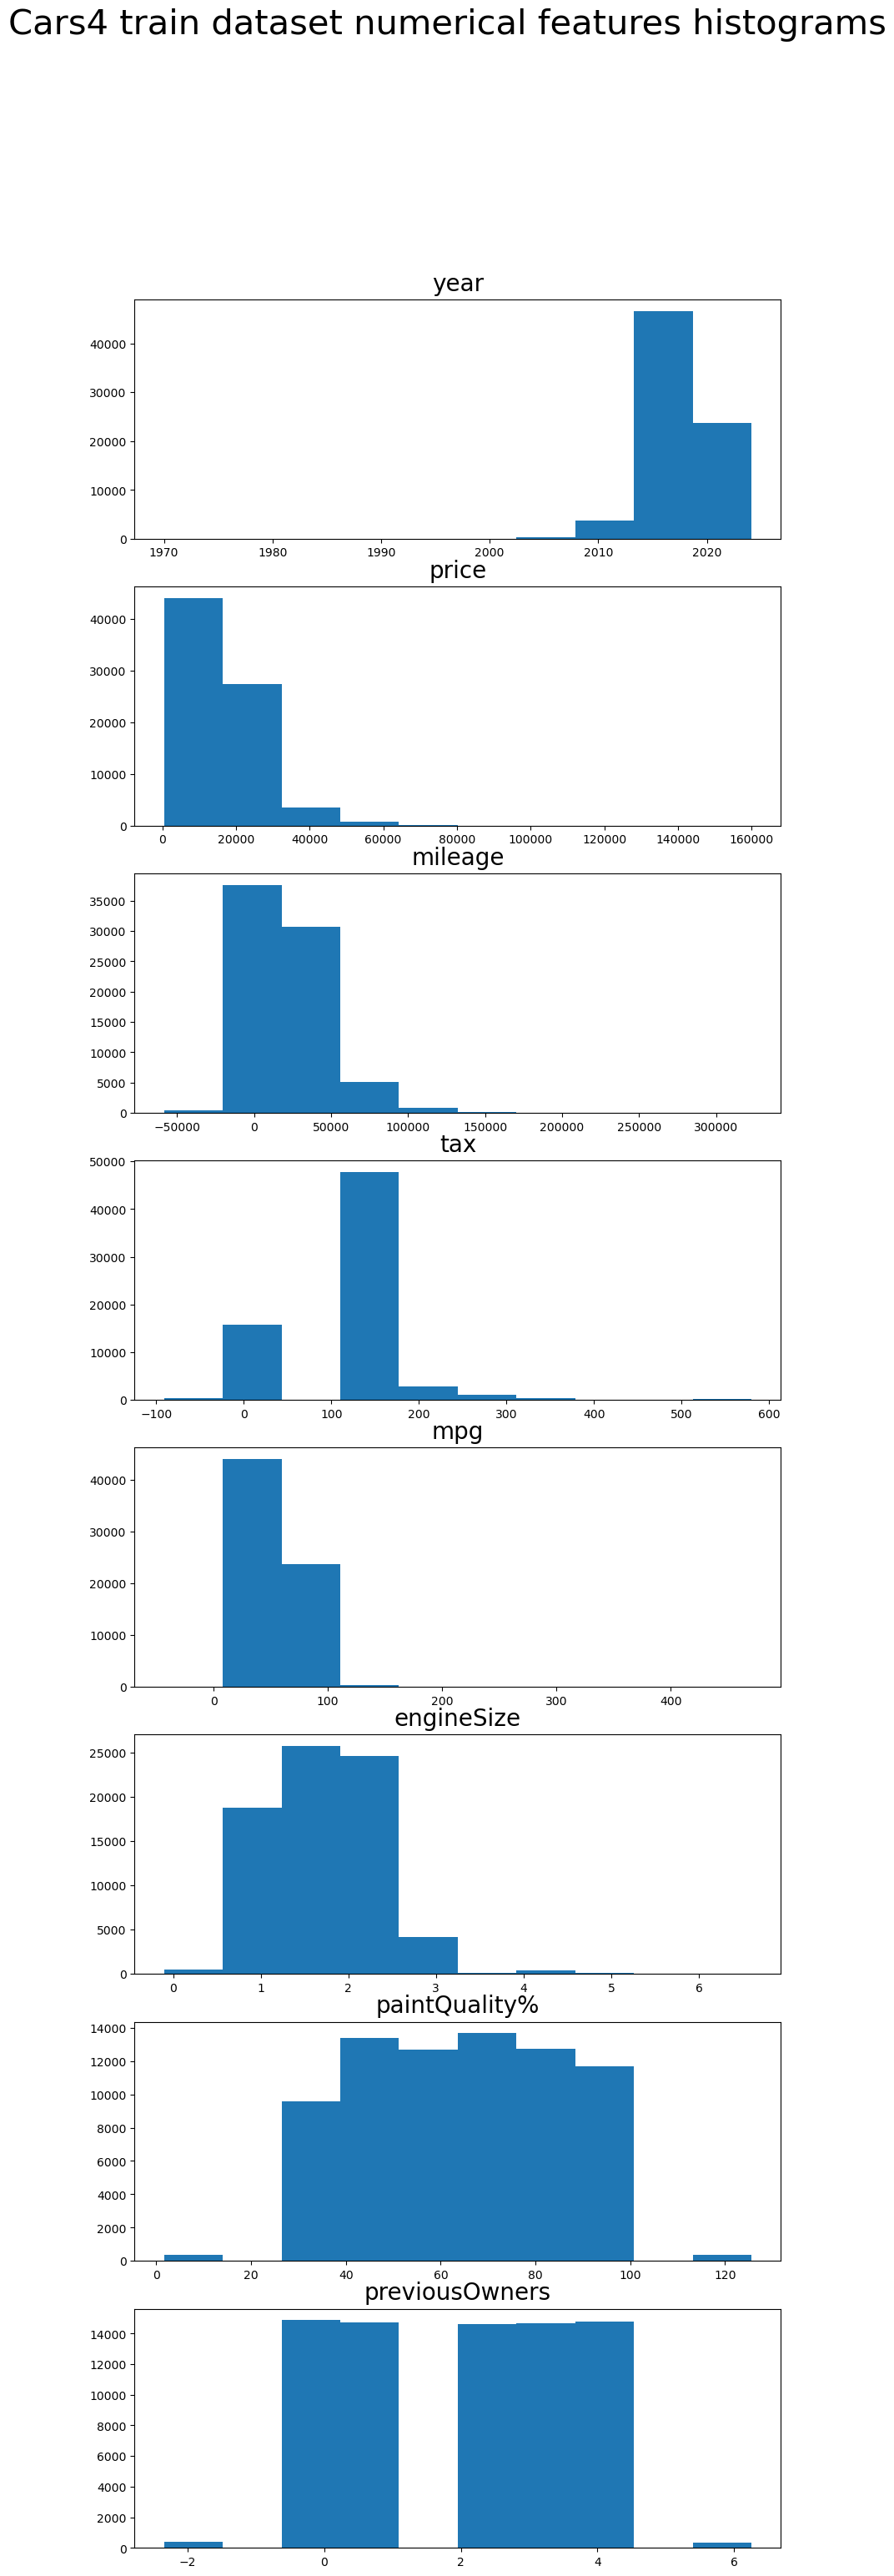

In [51]:
# Histogram 

# create individual axes for each one of the histograms 
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 35)) 

for ax, feature in zip(axes.flatten(), numerical_col):
    ax.hist(numerical_data[feature], bins=10) # we set the number of bins to 10 to see the distribution better
    ax.set_title(feature, fontsize=20, pad=8)

plt.suptitle("Cars4 train dataset numerical features histograms", fontsize=30)
plt.show()

From the histograms of numerical features we can see that price, mileage, tax, mpg and engineSize are skeweed to the right, whereas year is skeweed to the left.

In all of this cases we are going to use the median as the statictics to fill the missing data in these columns, because the median is less sensitive to outliers that the mean. 

Regarding the other 3 features, for paintQuality% and previousOwners we can use the mean, because they seem to follow a more normal distribution.

<hr>
<a class="anchor" id="data_preparation"></a>

# 2. Data Preparation

<hr>
<a class="anchor" id="handling_missing_values"></a>

## 2.1. Handling Missing Values

<hr>
<a class="anchor" id="outliers"></a>

## 2.2. Outlier Detection and Treatment

<hr>
<a class="anchor" id="categorical_encoding"></a>

## 2.3. Categorical Variable Encoding

<hr>
<a class="anchor" id="feature_engineering"></a>

## 2.4. Feature Engineering

<hr>
<a class="anchor" id="data_scaling"></a>

## 2.5. Data Scaling and Normalization

<hr>
<a class="anchor" id="feature_selection"></a>

# 3. Feature Selection

<hr>
<a class="anchor" id="selection_strategy"></a>

## 3.1. Feature Selection Strategy

<hr>
<a class="anchor" id="selection_implementation"></a>

## 3.2. Implementation and Results

<hr>
<a class="anchor" id="feature_justification"></a>

## 3.3. Final Feature Set Justification

<hr>
<a class="anchor" id="model_building"></a>

# 4. Model Building and Evaluation

<hr>
<a class="anchor" id="problem_type"></a>

## 4.1. Problem Type Identification

<hr>
<a class="anchor" id="algorithm_selection"></a>

## 4.2. Algorithm Selection

<hr>
<a class="anchor" id="assessment_strategy"></a>

## 4.3. Model Assessment Strategy

<hr>
<a class="anchor" id="model_training"></a>

## 4.4. Model Training and Prediction

<hr>
<a class="anchor" id="performance_metrics"></a>

## 4.5. Performance Metrics and Interpretation